In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
pd.set_option('display.max_columns', None)


In [2]:
# UNLP ror
institution_ror = catalog.load('params:openalex_fetch_options.institution_ror')

[03/10/25 11:19:42] INFO     Loading data from params:openalex_fetch_options.institution_ror    ]8;id=747820;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=773445;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (MemoryDataset)...                                                                    

## Dimensión institución

In [ ]:
sat_openalex_institution = catalog.load('stg_openalex/sat_openalex_institution')
hub_openalex_institution = catalog.load('stg_openalex/hub_openalex_institution')
hub_openalex_ror = catalog.load('stg_openalex/hub_openalex_ror')
link_openalex_institution_ror = catalog.load('stg_openalex/link_openalex_institution_ror')

dim_institution_openalex = pd.merge(
    hub_openalex_institution[['institution_hk','institution_id']],
    sat_openalex_institution[['institution_hk','country_code','display_name']],
    on="institution_hk"
)

dim_institution_openalex = pd.merge(
    dim_institution_openalex,
    link_openalex_institution_ror[['institution_hk','ror_hk']],
    on="institution_hk"
)

dim_institution_openalex = pd.merge(
    dim_institution_openalex,
    hub_openalex_ror[['ror_hk','ror']],
    on="ror_hk"
)

filter_ror = dim_institution_openalex['ror'] == institution_ror

dim_institution_openalex[filter_ror][['institution_id','country_code','display_name','ror']]

,institution_id,country_code,display_name,ror
2187,https://openalex.org/I874386039,AR,Universidad Nacional de La Plata,https://ror.org/01tjs6929


## fact affiliation

In [ ]:
link_openalex_author_institution = catalog.load('stg_openalex/link_openalex_author_institution')
hub_openalex_author = catalog.load('stg_openalex/hub_openalex_author')
sat_openalex_affiliation = catalog.load('stg_openalex/sat_openalex_affiliation')

fact_affiliation_openalex = pd.merge(
    link_openalex_author_institution[['author_institution_hk','author_hk','institution_hk']],
    hub_openalex_author[['author_hk','author_id']],
    on='author_hk'
)

fact_affiliation_openalex = pd.merge(
    fact_affiliation_openalex,
    sat_openalex_affiliation[['author_institution_hk','years']],
    on="author_institution_hk",
)

fact_affiliation_openalex = pd.merge(
    fact_affiliation_openalex,
    hub_openalex_institution,
    on="institution_hk"
)

fact_affiliation_openalex = fact_affiliation_openalex[['author_id','institution_id','years','institution_hk']]
fact_affiliation_openalex

,author_id,institution_id,years,institution_hk
0,https://openalex.org/A5052958858,https://openalex.org/I4210138160,2015,b'\x13\x9b\xfb\xb0mN\x19T\xc0\x85\x18-\xaf\xd8...
1,https://openalex.org/A5090728124,https://openalex.org/I874386039,2014,b'Yg\x0f\xef\xa2{\xdd\x1a\xa2\x1e\xf5\x06\x1du...
2,https://openalex.org/A5052610940,https://openalex.org/I4210106698,2021,b'\x1a\xc0\x08gj\xca\xdc\xfe\x92\x9d\xf0\xe3\x...
3,https://openalex.org/A5052610940,https://openalex.org/I4210106698,2024,b'\x1a\xc0\x08gj\xca\xdc\xfe\x92\x9d\xf0\xe3\x...
4,https://openalex.org/A5052610940,https://openalex.org/I4210106698,2022,b'\x1a\xc0\x08gj\xca\xdc\xfe\x92\x9d\xf0\xe3\x...
...,...,...,...,...
130340,https://openalex.org/A5073299545,https://openalex.org/I4210116650,2024,b'Q\x9f\xee\x97\xbe5L\xc6N\xefD-\xdbeD\x05'
130341,https://openalex.org/A5073299545,https://openalex.org/I4210116650,2022,b'Q\x9f\xee\x97\xbe5L\xc6N\xefD-\xdbeD\x05'
130342,https://openalex.org/A5012258130,https://openalex.org/I874386039,2002,b'Yg\x0f\xef\xa2{\xdd\x1a\xa2\x1e\xf5\x06\x1du...
130343,https://openalex.org/A5012258130,https://openalex.org/I874386039,2003,b'Yg\x0f\xef\xa2{\xdd\x1a\xa2\x1e\xf5\x06\x1du...


In [ ]:
fact_affiliation_openalex.groupby(['author_id','institution_id'])['years'].agg(list).reset_index()

,author_id,institution_id,years
0,https://openalex.org/A5000002080,https://openalex.org/I151201029,"[2021, 2024, 2015, 2017, 2016, 2010]"
1,https://openalex.org/A5000002080,https://openalex.org/I4210146412,"[2021, 2024, 2015, 2020, 2017, 2016, 2014]"
2,https://openalex.org/A5000002080,https://openalex.org/I874386039,[2010]
3,https://openalex.org/A5000002776,https://openalex.org/I184999862,"[2024, 2022, 2023, 2015, 2020, 2013, 2017, 201..."
4,https://openalex.org/A5000002776,https://openalex.org/I874386039,[2020]
...,...,...,...
44078,https://openalex.org/A5116061729,https://openalex.org/I151201029,[2025]
44079,https://openalex.org/A5116061729,https://openalex.org/I4210106698,[2025]
44080,https://openalex.org/A5116061729,https://openalex.org/I874386039,[2025]
44081,https://openalex.org/A5116101217,https://openalex.org/I874386039,[2024]


Instituciones que comparten filiación con autores institucionales 

In [ ]:
pd.merge(
    dim_institution_openalex[['institution_hk','institution_id','display_name']],
    fact_affiliation_openalex[['institution_hk','author_id']],
    on="institution_hk"
).groupby(['institution_id','display_name']).count().sort_values(by="institution_hk", ascending=False)

,,institution_hk,author_id
institution_id,display_name,,
https://openalex.org/I874386039,Universidad Nacional de La Plata,50185,50185
https://openalex.org/I151201029,Consejo Nacional de Investigaciones Científicas y Técnicas,25477,25477
https://openalex.org/I24354313,University of Buenos Aires,3068,3068
https://openalex.org/I4210120094,Instituto de Investigaciones Fisicoquímicas Teóricas y Aplicadas,2619,2619
https://openalex.org/I4210138160,Centro Científico Tecnológico - La Plata,2126,2126
...,...,...,...
https://openalex.org/I4210143196,Secretaría de Salud de Bogotá,1,1
https://openalex.org/I4210146163,De Agostini (Italy),1,1
https://openalex.org/I4210146104,Los Algarrobos Observatory,1,1


# fact publication

In [ ]:
sat_openalex_work = catalog.load('stg_openalex/sat_openalex_work')
hub_openalex_work = catalog.load('stg_openalex/hub_openalex_work')

fact_publication_openalex = pd.merge(
    hub_openalex_work,
    sat_openalex_work
    ).drop(columns=['load_datetime','source', 'hashdiff'])

fact_publication_openalex[['title','publication_year','cited_by_count','oa_status']].sort_values(by='cited_by_count', ascending=False)

[03/10/25 13:22:06] INFO     Loading data from stg_openalex/sat_openalex_work                   ]8;id=934043;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=431250;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

[03/10/25 13:22:09] INFO     Loading data from stg_openalex/hub_openalex_work                   ]8;id=182435;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=132435;file:///home/pablo/.local/lib/python3.10/site-packages/kedro/io/data_catalog.py#389\389]8;;\
                             (SQLTableDataset)...                                                                  

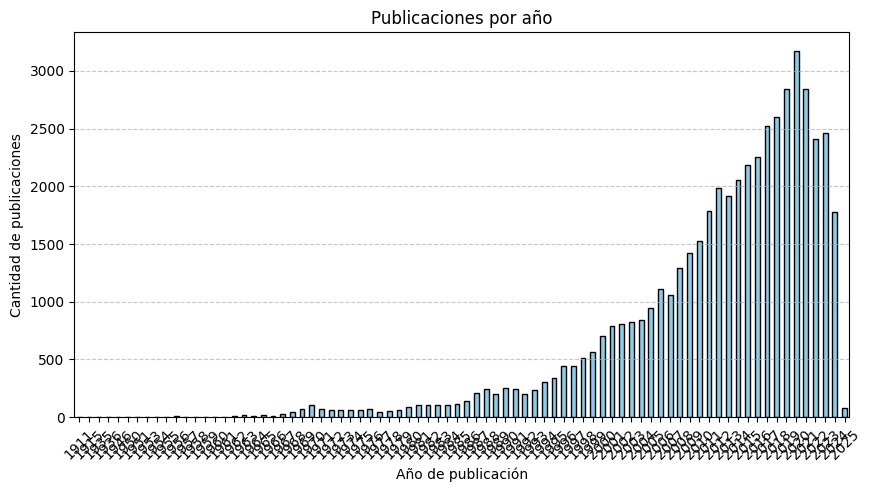

In [46]:

# Contar publicaciones por año
publications_per_year = fact_publication_openalex['publication_year'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 5))
publications_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Año de publicación')
plt.ylabel('Cantidad de publicaciones')
plt.title('Publicaciones por año')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()